# 11. Realisierung eines Halbaddierers mit Qiskit

  
Ein Quantencomputer kann auch klasssisch Rechnen. In diesem Notebook wird gezeigt, wie man mithilfe von Qubits und Quantengattern einen Halbaddierer, das Grundelement klassischer Computer, aufbaut.

Dazu benötigen wir vier Qubits (q) sowie zwei klassische Bits (c), um das Ergebnis zu speichern. Die folgende Abbildung zeigt den prinzipiellen Aufbau:


<img src="Bilder/QRechner.JPG" alt="Bild" style="width: 600px;"/>

Zuerst müssen wieder die benötigten Module geladen werden:

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_histogram

### Der Algorithmus

Der Schaltkreis soll nur die Operation `1+1` ausführen. Dafür werden die beiden Input-Bits zuvor jeweils durch `X` auf `1` gesetzt.

Für den **Algorithmus** benötien wir zwei $CNOT$-Gatter und ein $Toffoli$-Gate.

In Qiskit wird das $CNOT$ mit `cx` und das $Toffoli$ mit `ccx` bezeichnet. Die Argumente der beiden Gates werden aus dem Schaltkreis weiter unten ersichtlich.

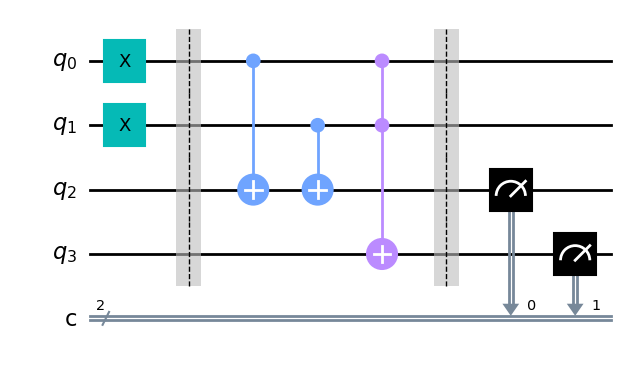

In [2]:
qc_ha = QuantumCircuit(4,2)
# Definition des Inputs in den Qubits 0 und 1
qc_ha.x(0) # Für a=0, diese Zeile auskommentieren
qc_ha.x(1) # Für b=0, diese Zeile auskommenteiren.
qc_ha.barrier()
# Die zwei CNOTs als klassisches XOR (eXclusive OR)
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# Das Toffoli-Gate entspricht dem klassischen AND-Gatter
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# Mit den Messungen wird der Output generiert (extrahiert)
qc_ha.measure(2,0) # Auslesen der XOR-Werte
qc_ha.measure(3,1) # Auslesen det AND-Werte

qc_ha.draw('mpl')

Die beiden $CNOT$-Gates führen die Addition von $q_0$ und $q_1$ durch und *schreiben* das Resultat auf $q_2$. Das $Toffoli$-Gate erzeugt ggf. den Übertrag und *schreibt* diesen auf $q_3$.

Aufgrund der Ausgangslage ist das Resultat eindeutig: $1+1$ auf $q_2$ setzt $q_2$ auf $|0\rangle$. Deshalb schreibt die Messung den Wert $0$ in des erste Bit von `c`. Weil sowohl $q_0$ als auch $q_1$ im Zustand $|1\rangle$ sind, wird $q_3$ auf $|1\rangle$ gesetzt. Nach der Messung wird deshalb das zweite Bit von `c ` auf $1$ gesetzt. Somit enthält `c` den Wert `10`. Dies enspricht dezimal der $2$. 

Dass sich hier bei jedem Durchang immer dasselbe Resultat ergibt, überprüfen wir, indem wir den Schaltkreis $1024$ mal durchlaufen lassen und die Ergebnisse in einem Histogramm darstellen.

Dies geschieht mit:


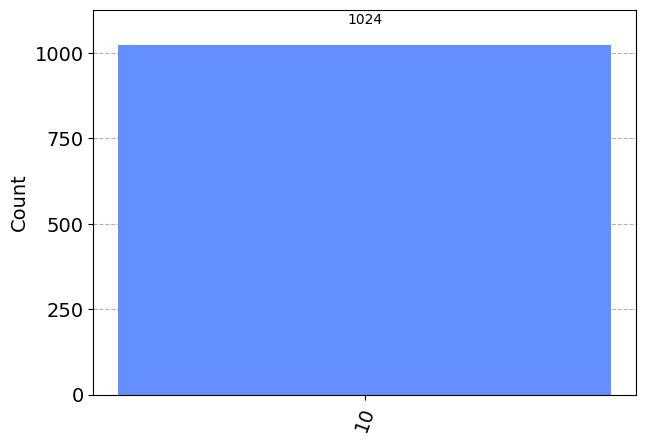

In [3]:
counts = execute(qc_ha,BasicAer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

**Ergebnis:** Wie Sie sehen, ist das Resultat tasächlich zu 100% `10`, was der binären Repräsentation von `2` entspricht.

### Weitere Experimente

Nun können Sie auch die anderen drei Möglichkeiten ($01$, $10$ und $00$ durchprobieren, indem Sie der Reihe nach oben in der Definition des Schaltkreises die Zeilen `qc_ha.x(0)` und `qc_ha.x(1)` mit `#` auskommentieren.


### Fazit

Der Halbaddierer enthält somit alles, was es braucht, um zwei Zahlen zu addieren. Mit den $NOT$-, $CNOT$- und $Toffoli$-Gates kann man Programme erstellen, mit denen man auch grössere Zahlen addieren kann.

Diese drei Gates reichen auch aus, um alles andere mit einem Computer zu bewerkstelligen.

Das Entscheidende Element an der Sache ist das $Toffoli$-Gate. Es wird deshalb zuweilen auch als das **Atom** der Mathematik bezeichnet. Es ist das einfachste Element, aus dem alle möglichen Problemlösungstechniken abeleitet werden können.
